In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv("student_data.csv")
df.head()


,Hours_Studied,Attendance,Pass_Fail
0,3.75,81.89,0
1,9.51,72.17,1
2,7.32,58.57,0
3,5.99,88.83,1
4,1.56,81.08,0


In [3]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hours_Studied  500 non-null    float64
 1   Attendance     500 non-null    float64
 2   Pass_Fail      500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB
None
       Hours_Studied  Attendance   Pass_Fail
count     500.000000  500.000000  500.000000
mean        4.985540   68.916960    0.286000
std         2.986884   17.129535    0.452342
min         0.050000   40.280000    0.000000
25%         2.415000   53.750000    0.000000
50%         5.130000   68.305000    0.000000
75%         7.565000   83.577500    1.000000
max         9.930000   99.980000    1.000000


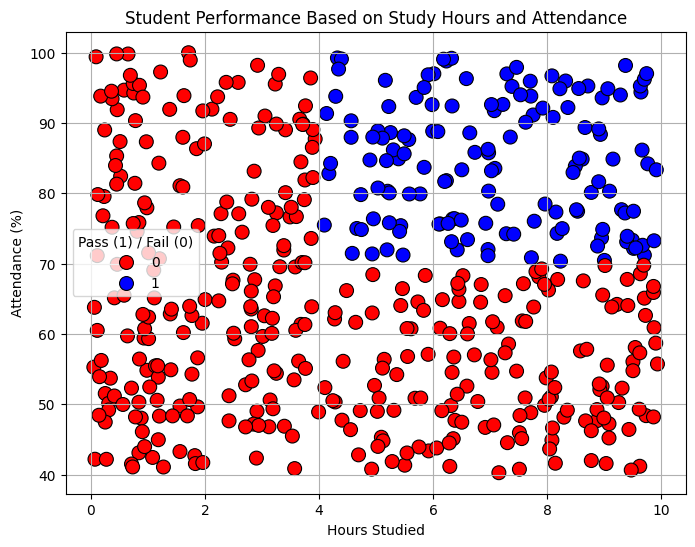

In [4]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Hours_Studied',
    y='Attendance',
    hue='Pass_Fail',
    palette={1: 'blue', 0: 'red'},
    edgecolor='black',
    s=100  # Increase marker size for clarity
)
plt.title("Student Performance Based on Study Hours and Attendance")
plt.xlabel("Hours Studied")
plt.ylabel("Attendance (%)")
plt.grid(True)
plt.legend(title='Pass (1) / Fail (0)')
plt.show()


In [5]:
X = df[['Hours_Studied', 'Attendance']]
y = df['Pass_Fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [7]:
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        73
           1       0.74      0.74      0.74        27

    accuracy                           0.86       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.86      0.86      0.86       100



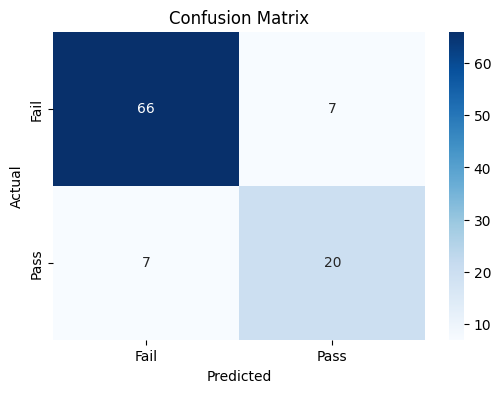

In [8]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [9]:
new_data = pd.DataFrame({'Hours_Studied': [6], 'Attendance': [80]})
prediction = model.predict(new_data)
print("Prediction (1 = Pass, 0 = Fail):", prediction[0])


Prediction (1 = Pass, 0 = Fail): 1
